In [ ]:
pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
pip install tqdm


In [ ]:
from praw.models import user
import praw
import pandas as pd
import prawcore.exceptions

In [ ]:
from datetime import datetime, timedelta
import praw

# initialization
reddit = praw.Reddit(
    client_id="nFKOCvQQEIoW2hFeVG6kfA",
    client_secret="5BBB4fr-HMPtO8f4jZhle74-fYcDkQ",
    user_agent="Icy_Process3191",
)


def fetch_posts(sub_name, interval, top_comments_count):

    subreddit = reddit.subreddit(sub_name)

    posts = subreddit.top(limit=None)

    posts_list = list(posts)
    posts_list.sort(key=lambda post: post.created_utc, reverse=True)



    intervals = {
        'daily': timedelta(days=1),
        'weekly': timedelta(weeks=1),
        'monthly': timedelta(weeks=4)
    }


    end_time = datetime.utcfromtimestamp(posts_list[0].created_utc)


    nested_posts = []
    current_interval_start = end_time
    current_interval_posts = []

    for post in posts_list:

        post_time = datetime.utcfromtimestamp(post.created_utc)

        if post_time < current_interval_start - intervals[interval]:
            nested_posts.append(current_interval_posts)
            current_interval_posts = []
            current_interval_start = post_time

        current_interval_posts.append(fetch_post_data(post, top_comments_count))


    if current_interval_posts:
        nested_posts.append(current_interval_posts)

    return nested_posts


sub_name = 'pharmacy'
interval = 'weekly'
top_comments_count = 3

fetch_posts(sub_name, interval, top_comments_count)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

[[Submission(id='186zhbl'), Submission(id='181mysr')], [Submission(id='18075fn'), Submission(id='17y0sk6'), Submission(id='17ww96p'), Submission(id='17wmjks'), Submission(id='17w6a7m')], [Submission(id='17sy75g'), Submission(id='17sh656'), Submission(id='17rl2m2'), Submission(id='17qwgu9'), Submission(id='17q31fr'), Submission(id='17owhxa'), Submission(id='17ov0nf')], [Submission(id='17mhd0h'), Submission(id='17jcbpz'), Submission(id='17ihbcl'), Submission(id='17iepo1'), Submission(id='17i66ot'), Submission(id='17i39o1'), Submission(id='17hgeqy')], [Submission(id='17gwluo'), Submission(id='17ftjxv'), Submission(id='17fs7k1'), Submission(id='17fon0z'), Submission(id='17fch6o'), Submission(id='17dvfz4')], [Submission(id='17b8kuk'), Submission(id='178x0ig'), Submission(id='176cans')], [Submission(id='174paiq'), Submission(id='173d1hi'), Submission(id='17378fb'), Submission(id='172ked5'), Submission(id='171q8u7'), Submission(id='170wpz3'), Submission(id='170l2do'), Submission(id='16zx8t7')

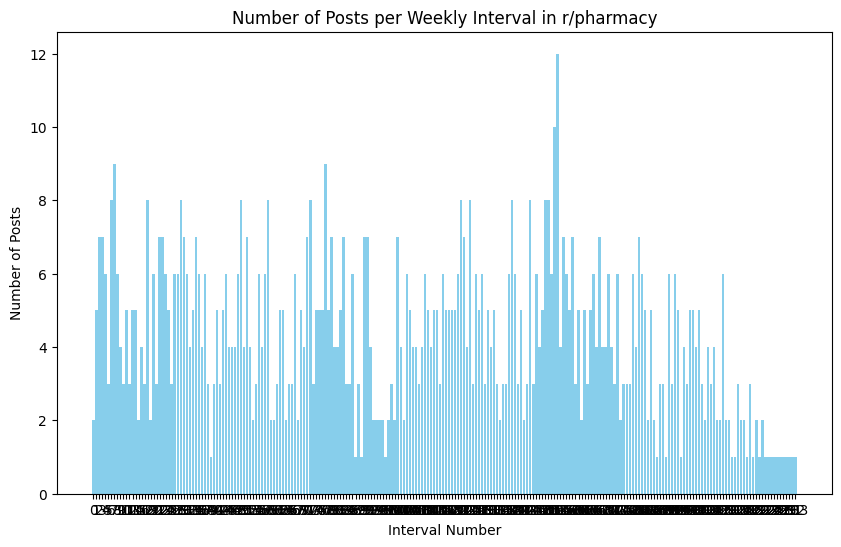

In [ ]:
import matplotlib.pyplot as plt

num_posts_per_interval = [len(interval_posts) for interval_posts in nested_posts]

interval_indices = list(range(len(nested_posts)))

plt.figure(figsize=(10, 6))
plt.bar(interval_indices, num_posts_per_interval, color='skyblue')
plt.xlabel('Interval Number')
plt.ylabel('Number of Posts')
plt.title(f'Number of Posts per {interval.capitalize()} Interval in r/{sub_name}')
plt.xticks(interval_indices)
plt.show()


In [ ]:
import time
import pandas as pd
from tqdm import tqdm

def create_csv(nested_posts, top_comments_count):
    data = []
    total_posts = sum(len(posts) for posts in nested_posts)

    with tqdm(total=total_posts, desc="Processing Posts") as pbar:
        for interval_index, interval_posts in enumerate(nested_posts):
            for post in interval_posts:

                data.append({
                    'Post/Comment': 'Post',
                    'ID': post.id,
                    'Text': post.title + post.selftext,
                    'Creation Date': datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                    'Interval Number': interval_index
                })

                try:

                    submission = reddit.submission(id=post.id)
                    submission.comment_sort = 'best'
                    submission.comments.replace_more(limit=None)

                    for comment in submission.comments[:top_comments_count]:
                        if hasattr(comment, "author") and comment.author:
                            data.append({
                                'Post/Comment': 'Comment',
                                'ID': comment.id,
                                'Text': comment.body,
                                'Creation Date': datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d'),
                                'Interval Number': interval_index
                            })
                except praw.exceptions.RedditAPIException as e:
                    print(f"Rate limit exceeded. Waiting for {e.sleep_time} seconds.")
                    time.sleep(e.sleep_time)

                pbar.update(1)

    df = pd.DataFrame(data)
    df.to_csv('reddit_posts_and_comments.csv', index=True)

create_csv(nested_posts, 3)


Streaming output truncated to the last 5000 lines.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multipl

Modularised version


In [88]:
import praw
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm
import prawcore
from concurrent.futures import ThreadPoolExecutor

class RedditScraper:

    def __init__(self, client_id, client_secret, user_agent):
        self.reddit = praw.Reddit(
            client_id=client_id,
            client_secret=client_secret,
            user_agent=user_agent
        )



    def fetch_posts(self, num_posts, sub_name, interval):
        subreddit = self.reddit.subreddit(sub_name)
        posts = subreddit.top(time_filter='week', limit=num_posts)
        posts_list = list(posts)
        posts_list.sort(key=lambda post: post.created_utc, reverse=True)

        intervals = {
            'daily': timedelta(days=1),
            'weekly': timedelta(weeks=1),
            'monthly': timedelta(weeks=4)
        }

        end_time = datetime.utcfromtimestamp(posts_list[0].created_utc)
        nested_posts = []
        current_interval_start = end_time
        data = []
        interval_num = 0

        for post in posts_list:
            post_time = datetime.utcfromtimestamp(post.created_utc)

            if post_time < current_interval_start - intervals[interval]:
                interval_num += 1
                current_interval_start = post_time

            data.append({
                    'Post/Comment': 'Post',
                    'ID': post.id,
                    'Text': post.title + post.selftext,
                    'Creation Date': datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                    'Interval Number': interval_num
                })

        return data, posts_list


    def fetch_comments(self, submission, limit, interval_num):
        submission.comment_sort = 'best'
        submission.comments.replace_more(limit=0)

        return [{'Post/Comment':'Comment', 'ID':submission.id, 'Text':comment.body, 'Creation Date':datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d'), 'Interval Number':interval_num} for comment in submission.comments.list()[:limit]]



    def create(self, num_posts, subreddit_name, interval, top_comments_count, output_file):

        data, posts_list = self.fetch_posts(num_posts, subreddit_name, interval)
        interval_nums = [d['Interval Number'] for d in data]

        with ThreadPoolExecutor() as executor:

            comments_list = list(executor.map(lambda p: self.fetch_comments(p[0], top_comments_count, p[1]), list(zip(posts_list, interval_nums))))


        data.extend([comment for comment_list in comments_list for comment in comment_list])


        print(len(data))
        df = pd.DataFrame(data)
        df.to_csv(output_file,index = True)



def main():

    scraper = RedditScraper(client_id="nFKOCvQQEIoW2hFeVG6kfA", client_secret="5BBB4fr-HMPtO8f4jZhle74-fYcDkQ", user_agent="Icy_Process3191")
    scraper.create(10, 'natureporn','weekly', 3, 'reddit_posts_and_comments.csv')

if __name__ == "__main__":
    main()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



36
